# XGBoost


## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import xgboost

/home/eunchong/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning:

0.23ubuntu1 is an invalid version and will not be supported in a future release

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning:

0.1.36ubuntu1 is an invalid version and will not be supported in a future release



In [3]:
print('pandas', pd.__version__)
print('xgboost', xgboost.__version__)

pandas 1.4.0
xgboost 1.5.2


## Data

In [4]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-02-22 16:34:02--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 65.9.42.103, 65.9.42.42, 65.9.42.72, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|65.9.42.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105379 (103K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>] 102.91K  --.-KB/s    in 0.08s   

2022-02-22 16:34:03 (1.26 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [105379/105379]



In [5]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(768, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-17,95143,3628,455,277,906,201,257,374,1513,915,...,279,271,4332,453,362,676,378,269,598,702
2022-02-18,87663,2656,590,242,782,216,188,364,1500,774,...,209,222,3738,396,382,707,312,227,483,681
2022-02-19,81576,2797,508,249,836,228,231,325,1527,854,...,216,214,3454,419,370,733,309,215,466,666
2022-02-20,71423,2334,245,270,695,164,196,286,1525,652,...,213,169,3189,204,258,470,230,207,388,527
2022-02-21,51930,1924,357,213,402,118,129,204,1204,371,...,151,90,2442,306,203,425,243,158,293,315


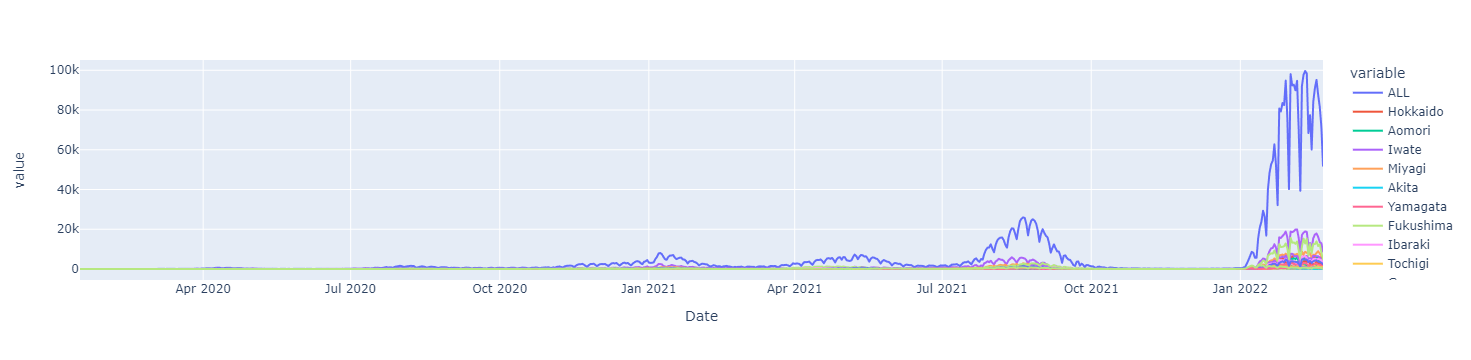

In [6]:
px.line(df, )

In [7]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).mean()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(110, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-23,46725.000000,1226.857143,186.857143,30.142857,186.000000,50.000000,61.285714,87.714286,641.285714,341.000000,...,225.285714,53.571429,1989.142857,225.428571,343.142857,600.428571,226.142857,243.285714,258.285714,1178.000000
2022-01-30,75534.285714,2217.857143,257.714286,118.000000,452.285714,200.857143,177.857143,302.857143,990.285714,583.857143,...,282.571429,139.142857,3449.285714,363.142857,391.571429,836.428571,342.571429,378.285714,479.142857,996.428571
2022-02-06,82612.142857,2809.142857,305.285714,148.000000,611.285714,188.142857,237.000000,481.571429,1372.714286,628.714286,...,251.857143,217.000000,3259.142857,482.142857,373.142857,594.571429,402.714286,334.428571,561.285714,641.857143
2022-02-13,81848.142857,3129.714286,373.857143,162.000000,673.000000,185.571429,183.714286,412.285714,1360.428571,687.142857,...,210.285714,243.428571,4024.857143,427.000000,401.857143,745.285714,399.000000,260.142857,529.000000,560.428571
2022-02-20,81582.714286,2680.571429,411.857143,222.428571,748.000000,192.142857,206.714286,353.571429,1306.000000,851.428571,...,226.571429,220.000000,3687.142857,410.285714,383.571429,700.857143,321.428571,219.142857,506.714286,606.142857


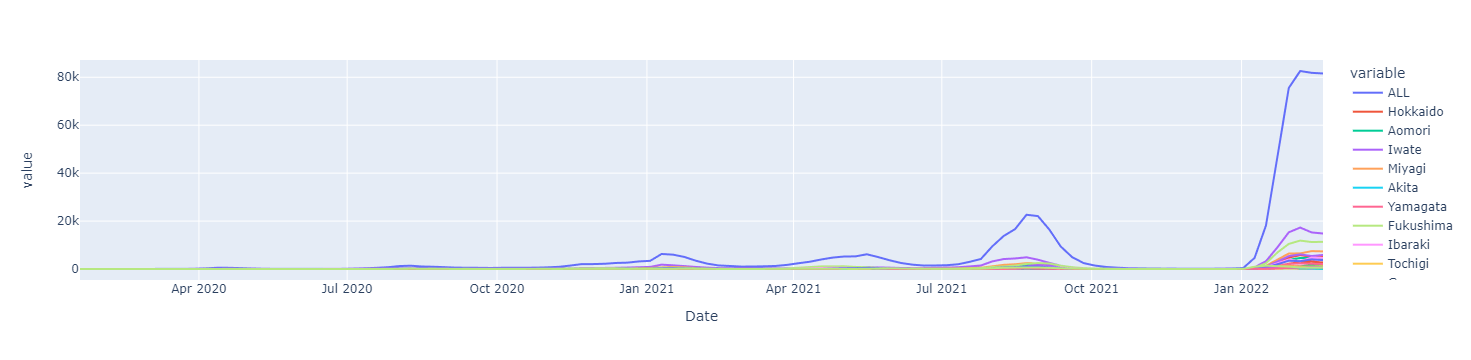

In [8]:
px.line(df_gr,)

### Scale

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
ts_all = df_gr.ALL
ts_all_sc = sc.fit_transform(ts_all.values.reshape(-1, 1)).ravel()
ts_all_sc = pd.Series(ts_all_sc, index=ts_all.index)
ts_all_sc.head(1)

Date
2020-01-19    0.0
Freq: W-SUN, dtype: float64

### FE

In [10]:
forecast_weeks = 12
# df_fe = df_gr.ALL.to_frame()
df_fe = ts_all_sc.to_frame(name='ALL')

# add new rows for forecast
index_list = pd.date_range(ts_all_sc.index[-1]+relativedelta(weeks=1), ts_all_sc.index[-1]+relativedelta(weeks=forecast_weeks), freq='W')
df_fe = pd.concat([df_fe, pd.DataFrame(index=index_list)])

# shift
for i in range(forecast_weeks, forecast_weeks+12):
    df_fe[f'ALL_{i}_week_ago'] = df_fe.ALL.shift(i)
# df_fe[f'ALL_12_week_ago'] = df_fe.ALL.shift(12)
df_fe['year'] = df_fe.index.year
df_fe['month'] = df_fe.index.month
df_fe['weekofyear'] = df_fe.index.isocalendar().week
df_fe = df_fe.astype('float')
df_fe = df_fe.loc[df_fe.ALL_23_week_ago.dropna().index, :]
df_fe

,ALL,ALL_12_week_ago,ALL_13_week_ago,ALL_14_week_ago,ALL_15_week_ago,ALL_16_week_ago,ALL_17_week_ago,ALL_18_week_ago,ALL_19_week_ago,ALL_20_week_ago,ALL_21_week_ago,ALL_22_week_ago,ALL_23_week_ago,year,month,weekofyear
2020-06-28,0.000964,0.003298,0.001351,0.000466,0.000549,0.000405,0.000191,0.000130,0.000023,0.000002,0.000011,0.000002,0.000000,2020.0,6.0,26.0
2020-07-05,0.002198,0.006013,0.003298,0.001351,0.000466,0.000549,0.000405,0.000191,0.000130,0.000023,0.000002,0.000011,0.000002,2020.0,7.0,27.0
2020-07-12,0.003653,0.005996,0.006013,0.003298,0.001351,0.000466,0.000549,0.000405,0.000191,0.000130,0.000023,0.000002,0.000011,2020.0,7.0,28.0
2020-07-19,0.005828,0.004595,0.005996,0.006013,0.003298,0.001351,0.000466,0.000549,0.000405,0.000191,0.000130,0.000023,0.000002,2020.0,7.0,29.0
2020-07-26,0.008949,0.002842,0.004595,0.005996,0.006013,0.003298,0.001351,0.000466,0.000549,0.000405,0.000191,0.000130,0.000023,2020.0,7.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-17,NaN,0.565594,0.220093,0.056066,0.004664,0.002714,0.001792,0.001389,0.001354,0.001088,0.001640,0.002174,0.002323,2022.0,4.0,15.0
2022-04-24,NaN,0.914324,0.565594,0.220093,0.056066,0.004664,0.002714,0.001792,0.001389,0.001354,0.001088,0.001640,0.002174,2022.0,4.0,16.0
2022-05-01,NaN,1.000000,0.914324,0.565594,0.220093,0.056066,0.004664,0.002714,0.001792,0.001389,0.001354,0.001088,0.001640,2022.0,5.0,17.0
2022-05-08,NaN,0.990752,1.000000,0.914324,0.565594,0.220093,0.056066,0.004664,0.002714,0.001792,0.001389,0.001354,0.001088,2022.0,5.0,18.0


### split

In [11]:
X = df_fe.drop('ALL', axis=1)
y = df_fe.ALL
print(X.shape, y.shape)

(99, 15) (99,)


## functions

In [12]:
def trainXGBoost(X_train, y_train):    
    # val
    X_val = X_train[X_train.index == X_train.index[-1]]
    X_train = X_train.drop(X_train.index[-1])
    y_val = y_train[y_train.index == y_train.index[-1]]
    y_train = y_train.drop(y_train.index[-1])
    
    params = {'n_estimators': 1000, 'random_state': 42, 'objective': 'reg:squarederror', 'booster': 'gblinear'}
    
    model = xgboost.XGBRegressor(**params)
    model.fit(
        X_train, y_train, verbose=0,
        eval_set=[(X_val, y_val)], eval_metric='rmse', early_stopping_rounds=10,
    )

    return model

## forecast

(80, 15) (80,)
CPU times: user 664 ms, sys: 11.8 ms, total: 676 ms
Wall time: 111 ms


/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



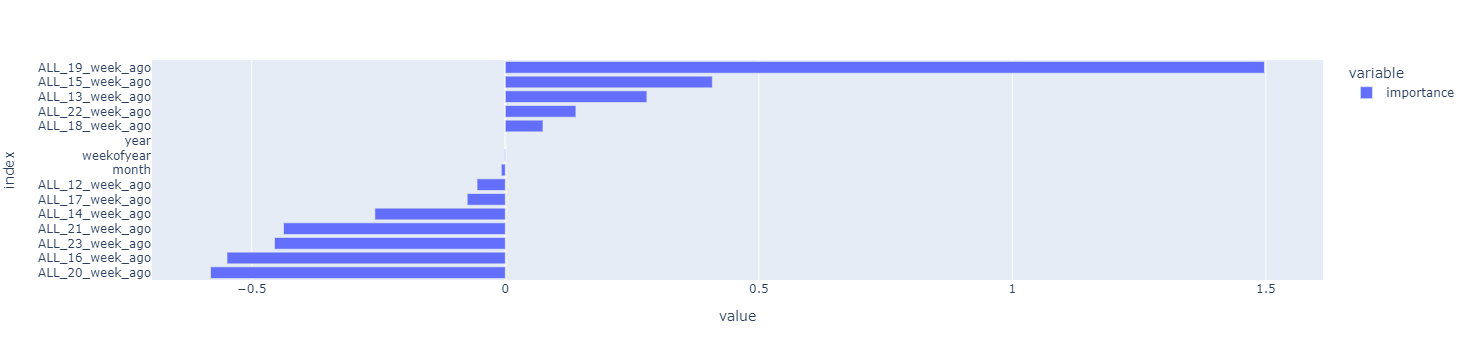

In [13]:
%%time

train_last_date = '2022-01-02'
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
print(X_train.shape, y_train.shape)

model = trainXGBoost(X_train, y_train)

fi = pd.DataFrame(model.coef_, index=X_train.columns, columns=['importance']).sort_values('importance')
px.bar(fi, orientation='h')

RMSE: 5531.8


/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



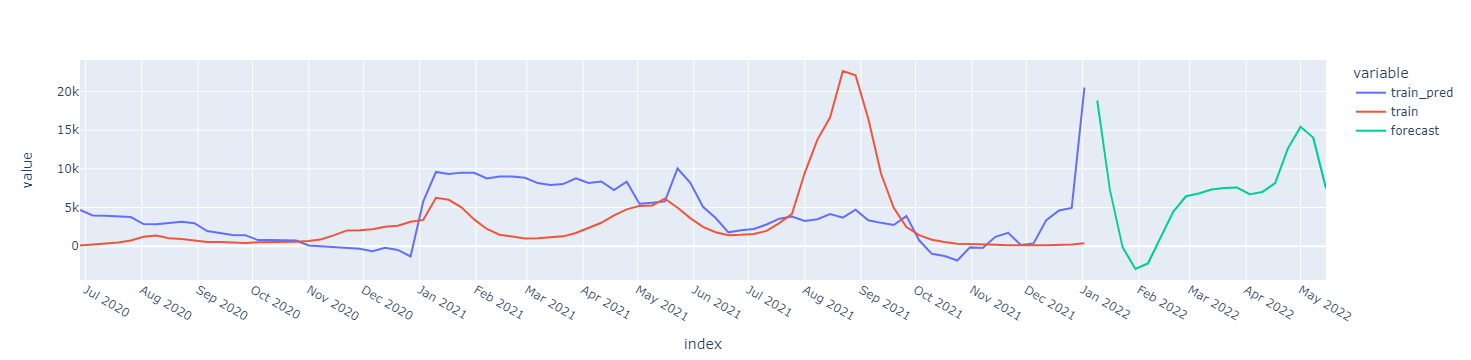

In [14]:
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
y_train_index = y_train.index

y_train_pred = model.predict(X_train)
y_train_pred = sc.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_train_pred = pd.Series(y_train_pred, index=y_train_index, name='train_pred')
y_train = sc.inverse_transform(y_train.values.reshape(-1, 1)).ravel()
y_train = pd.Series(y_train, index=y_train_index, name='train')

rmse = np.sqrt( mean_squared_error(y_train, y_train_pred) )
print('RMSE: {:.5}'.format(rmse))

X_forecast = X[X.index > train_last_date]
y_forecast = y[y.index > train_last_date]
y_forecast_index = y_forecast.index

y_forecast = model.predict(X_forecast)
y_forecast = sc.inverse_transform(y_forecast.reshape(-1, 1)).ravel()
y_forecast = pd.Series(y_forecast, index=y_forecast_index, name='forecast')

fig = px.line(pd.concat([y_train_pred, y_train, y_forecast], axis=1))
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()